In [1]:
import pandas as pd

df = pd.read_excel(r"C:\Users\user\Desktop\tips\output\Poc2.xlsx")
df.head()

,videoId,title,description,content_score,content_neg_ratio,channel,published,viewCount,likeCount,commentCount,...,amplification_rate,A,S,L_influence,neg_ratio,polarity_gap,conflict_flag,final_issue_score,final_emotion_score,final_negative_emotion_score
0,wbaFAR7sXFM,&quot;SKT 유심 무상교체 확정&quot; SK텔레콤 해킹 사고! 유심정보 유...,sk텔레콤 #SK해킹 #SK유심정보유출 #usim5 2025년 4월 19일 밤 11...,0.966747,0.016627,휴대폰 판매왕 폰킴 Phone Kim,2025-04-24T10:22:32Z,100890,1357,345,...,0.003420,0.286584,0.006972,0.381322,0.965517,-0.948891,True,0.68085,0.68085,0.68085
1,8xCwS3MdADo,[이슈] 유심 해킹 난리 속 &#39;유심 초기화&#39;가 대책? &quot;중국...,SK텔레콤 유심 해킹 사태 이후 휴대전화 보안에 불안을 느끼는 이용자가 많은데요. ...,0.000000,0.500000,KBS News,2025-04-29T03:49:38Z,106483,323,23,...,0.000216,0.018102,0.575707,0.365059,0.800000,-0.300000,False,0.62000,0.62000,0.62000
2,cYolbqd5xdQ,SKT 유심 해킹 즉시 해야하는 것,NaN,0.000000,0.500000,짤플리,2025-04-29T12:00:16Z,149143,1197,29,...,0.000194,0.016296,0.002080,0.323638,1.000000,-0.500000,False,0.70000,0.70000,0.70000
3,4oO59wu6AUg,🔴LIVE 국회 과방위 - &#39;유심해킹 질의&#39; 유영상 SK텔레콤 대표 ...,유심 #해킹 #skt #sk텔레콤 #청문회 #유출 #개인정보 # #SBS뉴스 #뉴스...,0.000000,0.500000,SBS 뉴스,2025-04-30T15:28:58Z,70025,278,19,...,0.000271,0.022740,0.840266,0.383137,1.000000,-0.500000,False,0.70000,0.70000,0.70000
4,WtSmeRGsFQI,[이슈] SKT 유심 해킹 자가 진단법 #skt #유심 #해킹,NaN,0.000000,0.500000,일민컷,2025-04-29T14:17:11Z,47075,381,18,...,0.000382,0.032045,0.000003,0.297195,1.000000,-0.500000,False,0.70000,0.70000,0.70000


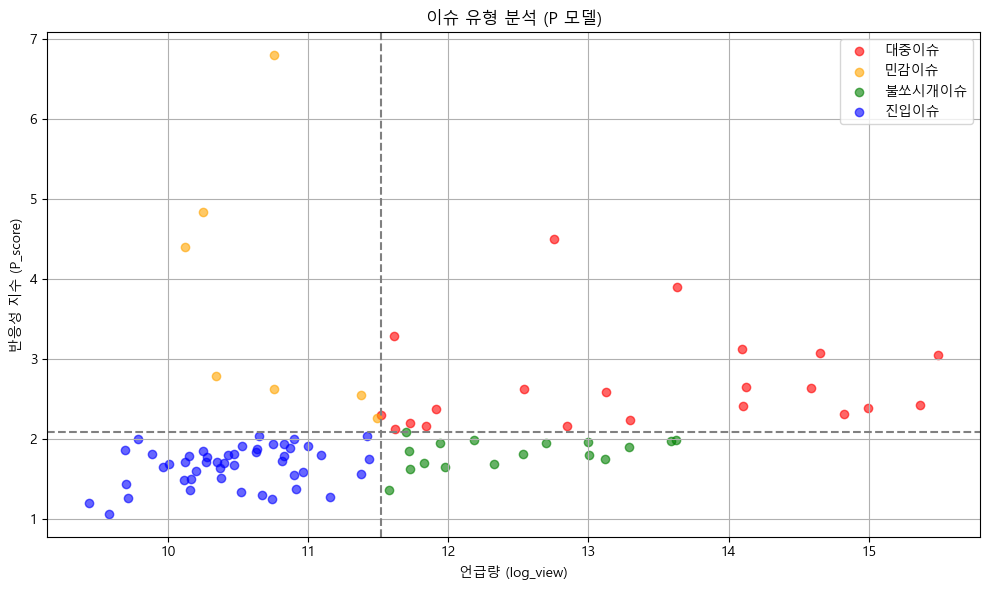

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우의 경우
# Mac의 경우: plt.rcParams['font.family'] = 'AppleGothic'

# 데이터프레임(df)이 이미 존재한다고 가정
# 필요한 로그 컬럼 생성
df['log_view'] = np.log1p(df['viewCount'])
df['log_like'] = np.log1p(df['likeCount'])
df['log_comment'] = np.log1p(df['commentCount'])
df['log_subscriber'] = np.log1p(df['subscriberCount'])

# 반응성 지수 (P지수) 계산
df['P_score'] = (df['log_view'] + df['log_like'] + df['log_comment']) / df['log_subscriber']

# 기준선 (평균값 기반)
x_thresh = df['log_view'].mean()
y_thresh = df['P_score'].mean()

# 사분면 분류 함수
def classify_issue(row):
    if row['log_view'] >= x_thresh and row['P_score'] >= y_thresh:
        return '대중이슈'
    elif row['log_view'] < x_thresh and row['P_score'] >= y_thresh:
        return '민감이슈'
    elif row['log_view'] < x_thresh and row['P_score'] < y_thresh:
        return '진입이슈'
    else:
        return '불쏘시개이슈'

df['issue_type'] = df.apply(classify_issue, axis=1)

# 시각화
color_map = {
    '대중이슈': 'red',
    '민감이슈': 'orange',
    '진입이슈': 'blue',
    '불쏘시개이슈': 'green'
}

plt.figure(figsize=(10, 6))
for issue, group in df.groupby('issue_type'):
    plt.scatter(group['log_view'], group['P_score'],
                label=issue, color=color_map[issue], alpha=0.6)

plt.axhline(y=y_thresh, linestyle='--', color='gray')
plt.axvline(x=x_thresh, linestyle='--', color='gray')
plt.title('이슈 유형 분석 (P 모델)')
plt.xlabel('언급량 (log_view)')
plt.ylabel('반응성 지수 (P_score)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1500x600 with 0 Axes>

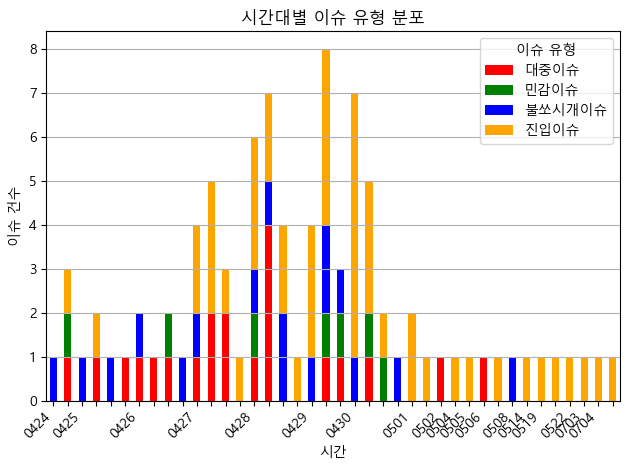

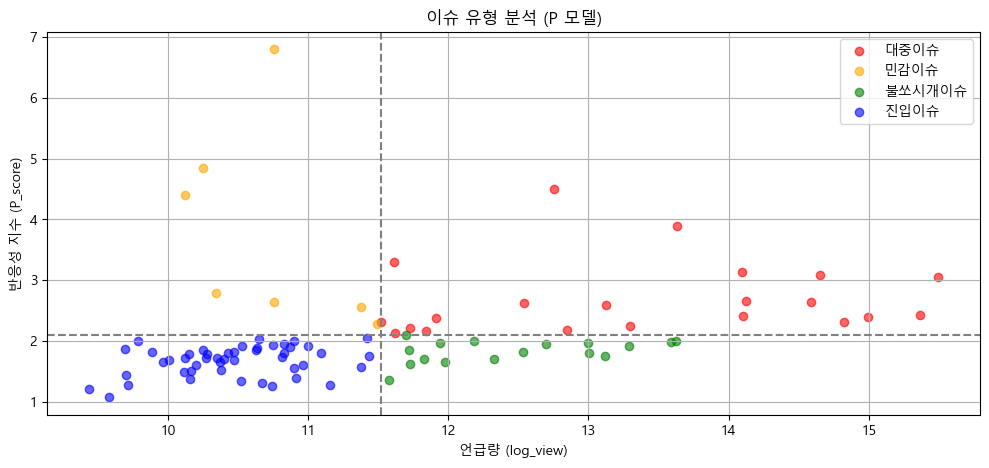

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우의 경우
# Mac의 경우: plt.rcParams['font.family'] = 'AppleGothic'

# 필요한 로그 컬럼 생성
df['log_view'] = np.log1p(df['viewCount'])
df['log_like'] = np.log1p(df['likeCount']) 
df['log_comment'] = np.log1p(df['commentCount'])
df['log_subscriber'] = np.log1p(df['subscriberCount'])

# 시간 컬럼 생성 - 6시간 단위
df["published"] = pd.to_datetime(df["published"]).dt.tz_localize(None)
df["date"] = df["published"].dt.floor("6H")

# 반응성 지수 (P지수) 계산
df['P_score'] = (df['log_view'] + df['log_like'] + df['log_comment']) / df['log_subscriber']

# 기준선 (평균값 기반)
x_thresh = df['log_view'].mean()
y_thresh = df['P_score'].mean()

# 사분면 분류 함수
def classify_issue(row):
    if row['log_view'] >= x_thresh and row['P_score'] >= y_thresh:
        return '대중이슈'
    elif row['log_view'] < x_thresh and row['P_score'] >= y_thresh:
        return '민감이슈'
    elif row['log_view'] < x_thresh and row['P_score'] < y_thresh:
        return '진입이슈'
    else:
        return '불쏘시개이슈'

df['issue_type'] = df.apply(classify_issue, axis=1)

# 시간별 이슈 유형 분포 시각화
plt.figure(figsize=(15, 6))

# 각 시간대별 이슈 유형 카운트
issue_counts = df.groupby(['date', 'issue_type']).size().unstack(fill_value=0)

# x축 레이블 포맷 변경 - 날짜가 바뀔 때만 표시
x_labels = issue_counts.index.strftime('%m%d')
unique_dates = []
prev_date = ''
for date in x_labels:
    if date != prev_date:
        unique_dates.append(date)
        prev_date = date
    else:
        unique_dates.append('')

# 누적 막대 그래프 그리기
ax = issue_counts.plot(kind='bar', stacked=True, color=['red', 'green', 'blue', 'orange'])
ax.set_xticklabels(unique_dates)

plt.title('시간대별 이슈 유형 분포')
plt.xlabel('시간')
plt.ylabel('이슈 건수')
plt.legend(title='이슈 유형')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.gca().margins(x=0.1)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# 원래 산점도도 함께 표시
plt.figure(figsize=(10, 6))
color_map = {
    '대중이슈': 'red',
    '민감이슈': 'orange', 
    '진입이슈': 'blue',
    '불쏘시개이슈': 'green'
}

for issue, group in df.groupby('issue_type'):
    plt.scatter(group['log_view'], group['P_score'],
                label=issue, color=color_map[issue], alpha=0.6)

plt.axhline(y=y_thresh, linestyle='--', color='gray')
plt.axvline(x=x_thresh, linestyle='--', color='gray')
plt.title('이슈 유형 분석 (P 모델)')
plt.xlabel('언급량 (log_view)')
plt.ylabel('반응성 지수 (P_score)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# x축 레이블이 더 잘 보이도록 여백 추가
plt.subplots_adjust(bottom=0.3)
plt.show()


In [ ]:
df10 = pd.read_excel(r"C:\Users\speec\OneDrive\Desktop\딥테크팁스\tips\output\LW_model_20251020.xlsx")
df10

In [ ]:
# 6시간 단위로 날짜 컬럼 생성


# issue_type 원핫인코딩
issue_dummies = pd.get_dummies(df["issue_type"], prefix="issue")

# 날짜 기준으로 그룹화하고 원핫인코딩된 컬럼들의 합계 계산
issue_by_date = issue_dummies.groupby(df["date_hour"]).sum().reset_index()

# df10과 원핫인코딩된 데이터를 date_hour 기준으로 병합
df10 = pd.merge(df10, issue_by_date, on="date_hour", how="left")

# 결과 확인
# LWP 모델 결과를 엑셀 파일로 저장
df10.to_excel('LWP_model_results.xlsx', index=False)



# 널값 제거 후 결과 확인 및 저장
df10 = df10.dropna()
df10.to_excel('LWP_model_results.xlsx', index=False)
df10.info()